In [1]:
import pandas as pd

df = pd.read_csv('train.csv').drop('id', axis=1)
df

,plate,date,price
0,X059CP797,2024-12-26 00:00:00,65000
1,Y800MH790,2024-07-12 21:31:37,100000
2,A212TX77,2024-04-18 00:00:00,290000
3,P001AY199,2025-01-03 00:27:15,680000
4,P001AY199,2025-01-10 09:32:41,750000
...,...,...,...
51630,X023PP797,2025-01-29 00:00:00,70000
51631,M004KA161,2025-01-31 00:00:00,1600000
51632,E888EB199,2025-02-06 00:00:00,850000
51633,X023XK77,2024-04-24 11:30:07,150000


In [2]:
df.describe()

,price
count,5.163500e+04
mean,4.532253e+05
std,1.793287e+06
min,2.000000e+04
25%,7.000000e+04
50%,1.500000e+05
75%,3.600000e+05
max,1.000000e+08


{'whiskers': [<matplotlib.lines.Line2D at 0x3061497c0>,
 'caps': [<matplotlib.lines.Line2D at 0x306149c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x306149580>],
 'medians': [<matplotlib.lines.Line2D at 0x30614a2a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x30614a5d0>],
 'means': []}

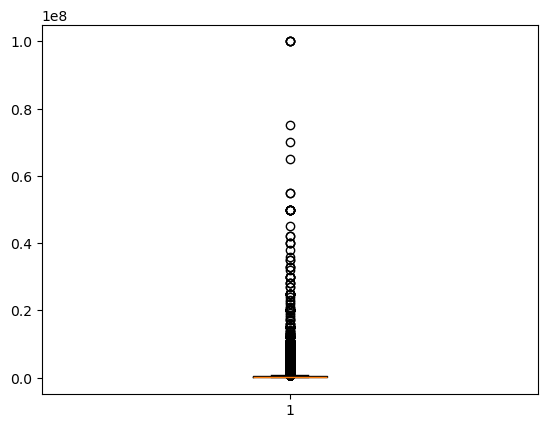

In [7]:
from matplotlib import pyplot as plt

plt.boxplot(df['price'])

In [9]:
df['plate_length'] = df['plate'].str.len()

In [11]:
df['plate_length'].value_counts()

plate_length
9    36195
8    15440
Name: count, dtype: int64

In [13]:
df.groupby('plate_length').describe().T

plate_length             8             9
price count   1.544000e+04  3.619500e+04
      mean    8.006511e+05  3.050210e+05
      std     2.813470e+06  1.066669e+06
      min     2.000000e+04  2.000000e+04
      25%     1.200000e+05  6.500000e+04
      50%     2.900000e+05  1.300000e+05
      75%     6.000000e+05  2.900000e+05
      max     1.000000e+08  1.000000e+08

In [15]:
# Split region and registration code from the plate

df['region'] = df['plate'].apply(lambda x: int(x[-2:]) if len(x) == 8 else int(x[-3:]))
df['registration_code'] = df['plate'].apply(lambda x: int(x[1:4]))
df['digit_1'] = df['plate'].apply(lambda x: x[0])
df['digit_2'] = df['plate'].apply(lambda x: x[4])
df['digit_3'] = df['plate'].apply(lambda x: x[5])

In [17]:
df

,plate,date,price,plate_length,region,registration_code,digit_1,digit_2,digit_3
0,X059CP797,2024-12-26 00:00:00,65000,9,797,59,X,C,P
1,Y800MH790,2024-07-12 21:31:37,100000,9,790,800,Y,M,H
2,A212TX77,2024-04-18 00:00:00,290000,8,77,212,A,T,X
3,P001AY199,2025-01-03 00:27:15,680000,9,199,1,P,A,Y
4,P001AY199,2025-01-10 09:32:41,750000,9,199,1,P,A,Y
...,...,...,...,...,...,...,...,...,...
51630,X023PP797,2025-01-29 00:00:00,70000,9,797,23,X,P,P
51631,M004KA161,2025-01-31 00:00:00,1600000,9,161,4,M,K,A
51632,E888EB199,2025-02-06 00:00:00,850000,9,199,888,E,E,B
51633,X023XK77,2024-04-24 11:30:07,150000,8,77,23,X,X,K


In [19]:
# Expensive plates
df[df['price'] > 100000000 * 0.50]

,plate,date,price,plate_length,region,registration_code,digit_1,digit_2,digit_3
1794,K252KK777,2024-10-14 00:00:00,100000000,9,777,252,K,K,K
14331,A777YX77,2024-01-25 16:37:41,65000000,8,77,777,A,Y,X
14334,A777YX77,2024-06-12 13:30:08,55000000,8,77,777,A,Y,X
21108,M026MM08,2024-03-30 00:00:00,100000000,8,8,26,M,M,M
22175,B888OP88,2024-06-15 00:00:00,55000500,8,88,888,B,O,P
41264,O039CA39,2024-07-02 00:00:00,75000000,8,39,39,O,C,A
43878,B777CY77,2024-08-02 00:00:00,100000000,8,77,777,B,C,Y
47081,X777XX05,2024-06-24 00:00:00,100000000,8,5,777,X,X,X
47086,Y293TY193,2024-02-10 00:00:00,70000000,9,193,293,Y,T,Y


In [21]:
# get the mean price for each duplicate plate
df['price'] = df.groupby('plate')['price'].transform('mean')
df = df.drop_duplicates(subset='plate').reset_index(drop=True)
df.describe()

,price,plate_length,region,registration_code
count,4.360500e+04,43605.000000,43605.000000,43605.000000
mean,4.370113e+05,8.695723,421.213737,415.663846
std,1.819148e+06,0.460106,344.084200,329.137070
min,2.000000e+04,8.000000,1.000000,1.000000
25%,7.000000e+04,8.000000,93.000000,90.000000
50%,1.500000e+05,9.000000,198.000000,386.000000
75%,3.500000e+05,9.000000,790.000000,717.000000
max,1.000000e+08,9.000000,977.000000,999.000000


In [23]:
df.head()

,plate,date,price,plate_length,region,registration_code,digit_1,digit_2,digit_3
0,X059CP797,2024-12-26 00:00:00,65000.0,9,797,59,X,C,P
1,Y800MH790,2024-07-12 21:31:37,100000.0,9,790,800,Y,M,H
2,A212TX77,2024-04-18 00:00:00,290000.0,8,77,212,A,T,X
3,P001AY199,2025-01-03 00:27:15,715000.0,9,199,1,P,A,Y
4,B400BB750,2022-04-09 00:00:00,50000.0,9,750,400,B,B,B


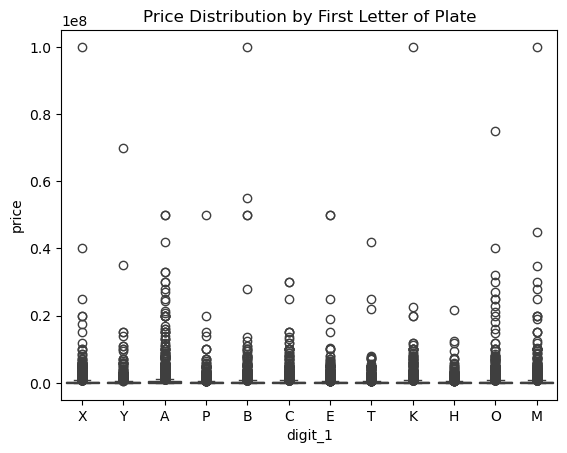

In [27]:
# findout whether the first letter is important or not 

# df.groupby('digit_1').describe()['price']


import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='digit_1', y='price', data=df)
plt.title('Price Distribution by First Letter of Plate')
plt.show()

In [29]:
import pandas as pd
import scipy.stats as stats

groups = [group["price"].values for _, group in df.groupby("digit_1")]

h_stat, p_value = stats.kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {h_stat}, p-value: {p_value}")

Kruskal-Wallis H-statistic: 411.47589729490534, p-value: 2.237479124003958e-81


## Encoding

In [54]:
unique_letters = set(''.join(df['plate'].str.extractall('([A-Z])')[0].tolist()))

letters = sorted(unique_letters)
letters

['A', 'B', 'C', 'E', 'H', 'K', 'M', 'O', 'P', 'T', 'X', 'Y']

In [68]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the positional columns
encoded_features = encoder.fit_transform(df[['digit_1', 'digit_2', 'digit_3']])

# Create a DataFrame with the encoded features and proper column names
encoded_df = pd.DataFrame(encoded_features, 
                          columns=encoder.get_feature_names_out(['digit_1', 'digit_2', 'digit_3']))

# Concatenate the encoded features with the original DataFrame (optional)
df_encoded = pd.concat([df, encoded_df], axis=1)

df_encoded

,plate,date,price,plate_length,region,registration_code,digit_1,digit_2,digit_3,digit_1_A,...,digit_3_C,digit_3_E,digit_3_H,digit_3_K,digit_3_M,digit_3_O,digit_3_P,digit_3_T,digit_3_X,digit_3_Y
0,X059CP797,2024-12-26 00:00:00,65000.0,9,797,59,X,C,P,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Y800MH790,2024-07-12 21:31:37,100000.0,9,790,800,Y,M,H,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A212TX77,2024-04-18 00:00:00,290000.0,8,77,212,A,T,X,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,P001AY199,2025-01-03 00:27:15,715000.0,9,199,1,P,A,Y,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,B400BB750,2022-04-09 00:00:00,50000.0,9,750,400,B,B,B,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43600,X023PP797,2024-03-25 10:38:34,112500.0,9,797,23,X,P,P,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
43601,M004KA161,2025-01-31 00:00:00,1600000.0,9,161,4,M,K,A,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43602,E888EB199,2025-02-06 00:00:00,850000.0,9,199,888,E,E,B,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43603,X023XK77,2024-04-24 11:30:07,150000.0,8,77,23,X,X,K,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
